In [155]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
from skopt import BayesSearchCV
from skopt.space import Real, Integer
import numpy as np
import shap
from sklearn.model_selection import KFold, cross_val_score
import numpy as np

In [2]:
# Load the preprocessed crop yield data
data_path = "data/crop_yield/df_modifed_preprocessed.csv"
data = pd.read_csv(data_path)

In [3]:
# Split the data into features (X) and target (y)
X = data.drop(columns=['Yield'])
y = data['Yield']

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Define the XGBoost regressor
xgboost_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

In [ ]:
param_space = {
    'n_estimators': Integer(187, 191),
    'learning_rate': Real(0.035, 0.041, prior='uniform'),
    'max_depth': Integer(6, 9),
    'subsample': Real(0.80, 0.83, prior='uniform'),
    'colsample_bytree': Real(0.68, 0.70, prior='uniform'),
    'gamma': Real(0.075, 0.095, prior='uniform'),
    'min_child_weight': Integer(7, 9),
    'reg_alpha': Real(0.27, 0.30, prior='uniform'),
    'reg_lambda': Real(1.01, 1.03, prior='uniform')
}

In [ ]:
opt = BayesSearchCV(estimator=xgboost_model, search_spaces=param_space, n_iter=50, cv=20, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1, random_state=42)
opt.fit(X_train, y_train)

In [ ]:
# Get the best model
best_model = opt.best_estimator_

In [ ]:
# Predict on the test set
y_pred = best_model.predict(X_test)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f"Best parameters: {opt.best_params_}")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

In [149]:
model = xgb.XGBRegressor(
    objective='reg:squarederror',
    colsample_bytree=0.691633323424183,
    gamma=0.0817650028055722,
    learning_rate=0.038318643029592786,
    max_depth=8,
    min_child_weight=8,
    n_estimators=191,
    reg_alpha=0.272188654131173,
    reg_lambda=1.1208407407361700,
    subsample=0.811533196016104,
    n_jobs=-1,
    booster='gbtree',
    verbosity=1,
    scale_pos_weight=1,
    base_score=0.52,
    random_state=42,
    early_stopping_rounds=10,
    eval_metric='mae',
    tree_method='hist',
    grow_policy='depthwise',
)


In [150]:
# Train the model
# Train the model with the validation set
model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    verbose=True
)

# Make predictions
y_pred = model.predict(X_test)

# Calculate R² score
r2_score = model.score(X_test, y_test)
print(f"R² Score: {r2_score}")

[0]	validation_0-mae:0.83385
[1]	validation_0-mae:0.80696
[2]	validation_0-mae:0.77862
[3]	validation_0-mae:0.75161
[4]	validation_0-mae:0.72682
[5]	validation_0-mae:0.70239
[6]	validation_0-mae:0.68040
[7]	validation_0-mae:0.65812
[8]	validation_0-mae:0.63619
[9]	validation_0-mae:0.61389
[10]	validation_0-mae:0.59290
[11]	validation_0-mae:0.57481
[12]	validation_0-mae:0.55597
[13]	validation_0-mae:0.53906
[14]	validation_0-mae:0.52232
[15]	validation_0-mae:0.50577
[16]	validation_0-mae:0.48944
[17]	validation_0-mae:0.47379
[18]	validation_0-mae:0.45890
[19]	validation_0-mae:0.44473
[20]	validation_0-mae:0.43142
[21]	validation_0-mae:0.41923
[22]	validation_0-mae:0.40794
[23]	validation_0-mae:0.39622
[24]	validation_0-mae:0.38600
[25]	validation_0-mae:0.37581
[26]	validation_0-mae:0.36744
[27]	validation_0-mae:0.35856
[28]	validation_0-mae:0.35056
[29]	validation_0-mae:0.34226
[30]	validation_0-mae:0.33428
[31]	validation_0-mae:0.32647
[32]	validation_0-mae:0.31951
[33]	validation_0-ma

In [ ]:
# Define a tolerance value
tolerance = 0.1

# Calculate absolute differences
absolute_differences = np.abs(y_test - y_pred)

# Determine correct predictions
correct_predictions = absolute_differences <= tolerance

# Calculate accuracy
accuracy = np.mean(correct_predictions)
print(f"Accuracy: {accuracy}")

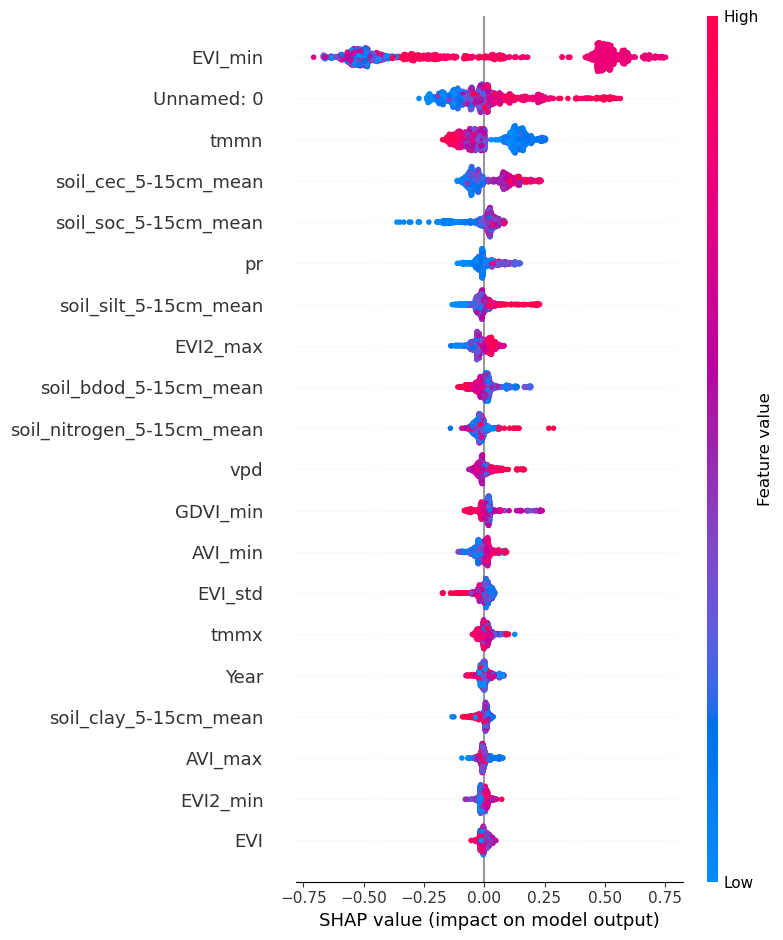

In [152]:
explainer = shap.Explainer(model)
shap_values = explainer(X_test)

# Plot the SHAP values
shap.summary_plot(shap_values, X_test)